In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [2]:
historical_bonds = pd.read_csv('historical_bonds.csv')
simulation_bonds = pd.read_csv('simulation_bonds.csv')
historical_bonds["credit_region"] = historical_bonds["credit_rating"] + " - " + historical_bonds["region"]
historical_bonds.head(10)


,Unnamed: 0,credit_rating,debt_to_equity,energy_capacity,esg_rating,region,cash_flow_1,cash_flow_2,cash_flow_3,credit_region
0,0,AAA,-0.364063,3.277333,57.459739,North America,16073.383072,18258.536478,19058.838868,AAA - North America
1,1,AA,-0.098335,17.823871,22.871580,North America,24916.360679,24239.463191,24424.154724,AA - North America
2,2,B,0.938648,25.360441,42.125540,North America,39714.279589,35392.069106,0.000000,B - North America
3,3,A,2.332380,38.748027,50.833794,Europe,38811.989952,51241.902369,62943.802597,A - Europe
4,4,AAA,1.367557,14.223886,21.952435,Asia,24840.652670,29598.165602,35355.805194,AAA - Asia
5,5,AA,1.136835,45.559230,4.937207,North America,41319.949490,49554.860943,56756.581917,AA - North America
6,6,BB,0.326345,29.202362,2.679368,Asia,51735.147503,45192.425815,41922.076984,BB - Asia
7,7,AA,-0.071959,20.476767,24.087962,Europe,26603.161560,26006.160333,24822.651000,AA - Europe
8,8,A,1.404687,24.008972,39.442283,North America,32354.247347,33708.722166,33763.059334,A - North America
9,9,BBB,0.544998,11.235985,69.104053,Europe,34997.692078,38896.668698,41406.625888,BBB - Europe


In [3]:
historical_bonds['credit_rating'].unique()

array(['AAA', 'AA', 'B', 'A', 'BB', 'BBB', 'CCC'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

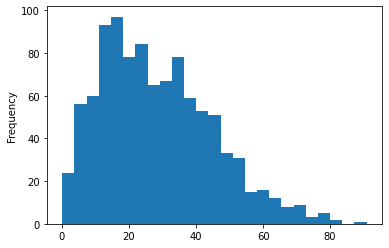

In [4]:
historical_bonds['energy_capacity'].plot(kind='hist', bins=25)

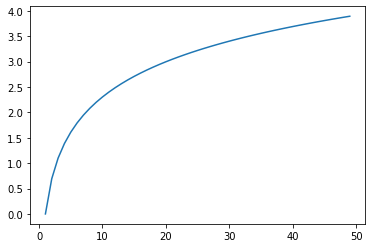

In [5]:
x = np.arange(1, 50) 
y = np.log(x)

plt.plot(x, y)

<AxesSubplot:xlabel='log_x'>

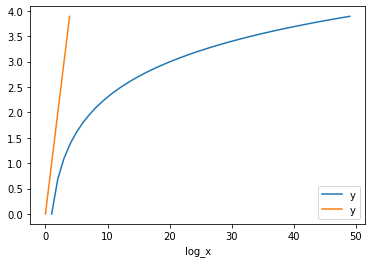

In [6]:
df = pd.DataFrame.from_dict({'x': x, 'y': y})
df['log_x'] = df['x'].apply(np.log)

fig, ax = plt.subplots()
df.plot(x='x', y='y', ax=ax)
df.plot(x='log_x', y='y', ax=ax)

In [7]:
import statsmodels.api as sm

In [8]:
mask = historical_bonds['credit_rating'] == 'AAA'
x = sm.add_constant(historical_bonds.loc[mask, ['esg_rating']].add(1).apply(lambda x: x ** 2))
y = historical_bonds.loc[mask, 'cash_flow_1']

model = sm.OLS(y, x).fit() 

model.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cash_flow_1   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     7.491
Date:                Wed, 19 Feb 2025   Prob (F-statistic):            0.00660
Time:                        13:55:46   Log-Likelihood:                -2817.7
No. Observations:                 281   AIC:                             5639.
Df Residuals:                     279   BIC:                             5647.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.741e+04    479.803     57.132      0.000    2.65e+04    2.84e+04
esg_rating     0.2861      0.105      2.737      0.007       0.080       0.492
==============================================================================
Omnibus:                        3.445   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                2.519
Skew:                           0.063   Prob(JB):                        0.284
Kurtosis:                       2.553   Cond. No.                     6.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
x = sm.add_constant(historical_bonds.loc[mask, ['esg_rating']])
# y = historical_bonds['cash_flow_1']

model = sm.OLS(y, x).fit() 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cash_flow_1   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.302
Date:                Wed, 19 Feb 2025   Prob (F-statistic):              0.130
Time:                        13:55:48   Log-Likelihood:                -2820.2
No. Observations:                 281   AIC:                             5644.
Df Residuals:                     279   BIC:                             5652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.754e+04    641.789     42.906      0.000    2.63e+04    2.88e+04
esg_rating    17.0758     11.254      1.517      0.130      -5.077      39.229
==============================================================================
Omnibus:                        3.538   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.818
Skew:                           0.124   Prob(JB):                        0.244
Kurtosis:                       2.577   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
historical_bonds['energy_capacity_log'] = historical_bonds['energy_capacity'].add(1).apply(np.log)

<Axes: xlabel='energy_capacity_log', ylabel='cash_flow_1'>

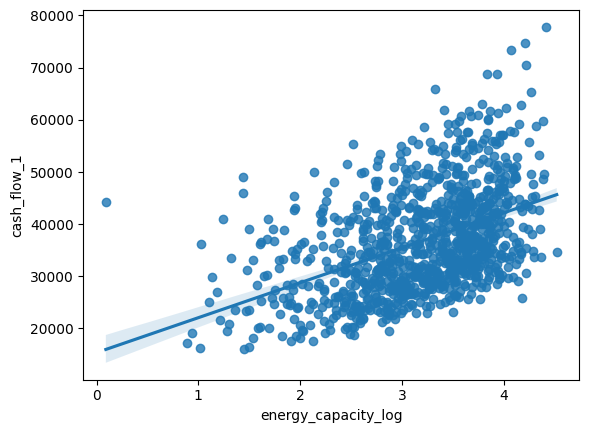

In [38]:
sns.regplot(data=historical_bonds, x='energy_capacity_log', y='cash_flow_1')

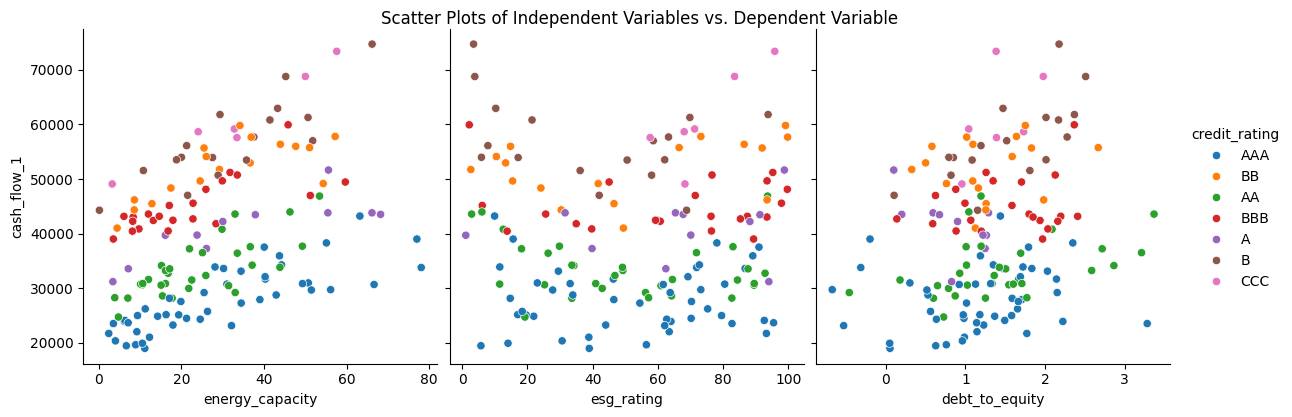

In [121]:
north_america_AAA = historical_bonds[historical_bonds["credit_region"] == "A - Asia"]

REGION = 'Asia'
RATING = ['BBB', 'AAA']
by_region = historical_bonds[historical_bonds['region'] == REGION]
by_rating = historical_bonds[historical_bonds['credit_rating'].isin(RATING)]

sns.pairplot(by_region, 
             x_vars=["energy_capacity", "esg_rating", "debt_to_equity"], 
             y_vars=["cash_flow_1"], 
             kind="scatter", 
             height=4, 
             aspect=1, hue='credit_rating')

plt.suptitle("Scatter Plots of Independent Variables vs. Dependent Variable", y=1.02)
plt.show()


In [135]:
training_data = historical_bonds[["energy_capacity", "debt_to_equity", "credit_region","cash_flow_1", "cash_flow_2", "cash_flow_3", 'credit_rating', 'region', 'esg_rating']]
training_data

,energy_capacity,debt_to_equity,credit_region,cash_flow_1,cash_flow_2,cash_flow_3,credit_rating,region,esg_rating
0,3.277333,-0.364063,AAA - North America,16073.383072,18258.536478,19058.838868,AAA,North America,57.459739
1,17.823871,-0.098335,AA - North America,24916.360679,24239.463191,24424.154724,AA,North America,22.871580
2,25.360441,0.938648,B - North America,39714.279589,35392.069106,0.000000,B,North America,42.125540
3,38.748027,2.332380,A - Europe,38811.989952,51241.902369,62943.802597,A,Europe,50.833794
4,14.223886,1.367557,AAA - Asia,24840.652670,29598.165602,35355.805194,AAA,Asia,21.952435
...,...,...,...,...,...,...,...,...,...
995,17.527648,0.840647,CCC - Europe,50876.513554,53549.216004,0.000000,CCC,Europe,26.744813
996,18.241791,0.632371,AAA - Europe,25788.520417,27706.100521,27425.785246,AAA,Europe,94.688375
997,23.294626,1.086183,AA - North America,29631.868285,28941.561132,28827.280542,AA,North America,25.456681
998,77.065382,-0.197552,AAA - Asia,38988.652285,44413.990671,49565.597051,AAA,Asia,15.642536


In [157]:
grouped = training_data.groupby('credit_rating')
regression_results = []

for region, group in grouped:
    X = sm.add_constant(group[['energy_capacity', 'debt_to_equity']])  # Now includes both independent variables
    y = group['cash_flow_1'].values 

    model = sm.OLS(y, X).fit()

    conf_ints = model.conf_int()
    
    regression_results.append({
        'credit_region': region,
        'energy_capacity_coefficient': model.params.loc['energy_capacity'],
        'debt_to_equity_coefficient': model.params.loc['debt_to_equity'],
        'debt_to_equity_lower_ci': model.conf_int().loc['debt_to_equity', 0],
        'debt_to_equity_upper_ci': model.conf_int().loc['debt_to_equity', 1],
        'energy_capacity_lower_ci': model.conf_int().loc['energy_capacity', 0],
        'energy_capacity_upper_ci': model.conf_int().loc['energy_capacity', 1],
        'intercept': model.params.loc['const'],
        'r2': model.rsquared, 
        'cash_flow_model': 0  # Placeholder,

    })

cash_flow_1_models = pd.DataFrame(regression_results)

cash_flow_1_models.head()


,credit_region,energy_capacity_coefficient,debt_to_equity_coefficient,debt_to_equity_lower_ci,debt_to_equity_upper_ci,energy_capacity_lower_ci,energy_capacity_upper_ci,intercept,r2,cash_flow_model
0,A,308.536467,2725.204805,1688.789496,3761.620115,267.976239,349.096694,24255.700891,0.738769,0
1,AA,246.748948,3177.777862,2703.133522,3652.422202,223.957530,269.540365,21419.691031,0.733576,0
2,AAA,266.671854,2880.149916,2452.026352,3308.273481,247.586000,285.757708,17335.010417,0.766491,0
3,B,240.750037,4404.992563,2710.570012,6099.415114,170.033294,311.466780,35985.789194,0.381412,0
4,BB,323.100961,2955.205993,1490.655710,4419.756276,251.995997,394.205925,31741.075368,0.539412,0


<Axes: >

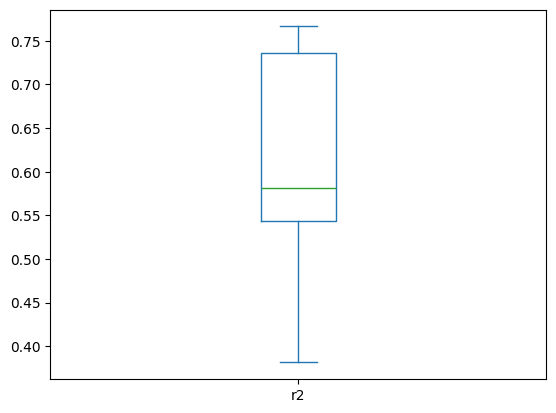

In [160]:
cash_flow_1_models['r2'].plot(kind='box')

In [89]:
df.max()

credit_region                  South America
energy_capacity_coefficient       377.641511
debt_to_equity_coefficient       5228.364774
debt_to_equity_lower_ci          2786.818706
debt_to_equity_upper_ci          8499.500984
energy_capacity_lower_ci          258.605345
energy_capacity_upper_ci          621.163703
intercept                       26931.860088
cash_flow_model                            0
dtype: object

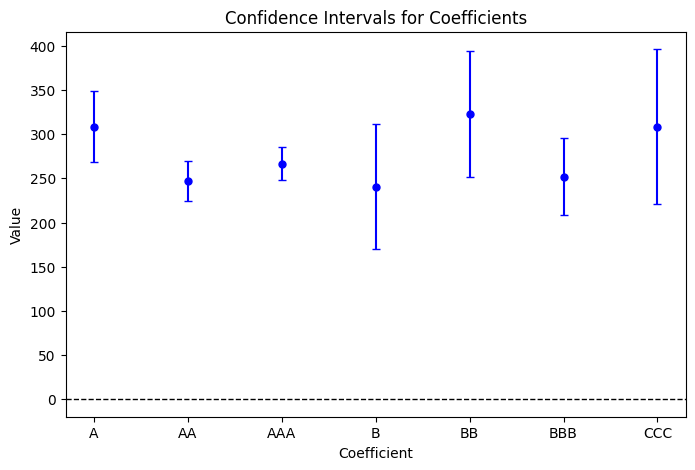

In [90]:
# Plot
VARIABLE = 'energy_capacity'

mask = cash_flow_1_models['credit_region'] != 'CCC - South America'

df = cash_flow_1_models.loc[mask]

fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(df['credit_region'], df[f"{VARIABLE}_coefficient"], 
            yerr=[df[f"{VARIABLE}_coefficient"] - df[f"{VARIABLE}_lower_ci"], df[f"{VARIABLE}_upper_ci"] - df[f"{VARIABLE}_coefficient"]], 
            fmt='o', capsize=3, capthick=1, markersize=5, color='blue')

# Labels and title
ax.set_xlabel("Coefficient")
ax.set_ylabel("Value")
ax.set_title("Confidence Intervals for Coefficients")
ax.axhline(0, color='black', linestyle='--', linewidth=1)  # Horizontal line at 0

plt.show()

### Model everything together

In [ ]:
training_data.head()

,energy_capacity,debt_to_equity,credit_region,cash_flow_1,cash_flow_2,cash_flow_3,credit_rating,region,esg_rating
0,3.277333,-0.364063,AAA - North America,16073.383072,18258.536478,19058.838868,AAA,North America,57.459739
1,17.823871,-0.098335,AA - North America,24916.360679,24239.463191,24424.154724,AA,North America,22.871580
2,25.360441,0.938648,B - North America,39714.279589,35392.069106,0.000000,B,North America,42.125540
3,38.748027,2.332380,A - Europe,38811.989952,51241.902369,62943.802597,A,Europe,50.833794
4,14.223886,1.367557,AAA - Asia,24840.652670,29598.165602,35355.805194,AAA,Asia,21.952435


In [152]:
training_data['credit_rating'].unique()

array(['AAA', 'AA', 'B', 'A', 'BB', 'BBB', 'CCC'], dtype=object)

In [153]:
training_data_dummies = pd.get_dummies(training_data, columns=["credit_rating", 'region'], prefix="rating", dtype=int).drop(['rating_AAA', 'rating_North America'], axis=1)

training_data_dummies.head()

,energy_capacity,debt_to_equity,credit_region,cash_flow_1,cash_flow_2,cash_flow_3,esg_rating,rating_A,rating_AA,rating_B,rating_BB,rating_BBB,rating_CCC,rating_Asia,rating_Europe,rating_South America
0,3.277333,-0.364063,AAA - North America,16073.383072,18258.536478,19058.838868,57.459739,0,0,0,0,0,0,0,0,0
1,17.823871,-0.098335,AA - North America,24916.360679,24239.463191,24424.154724,22.871580,0,1,0,0,0,0,0,0,0
2,25.360441,0.938648,B - North America,39714.279589,35392.069106,0.000000,42.125540,0,0,1,0,0,0,0,0,0
3,38.748027,2.332380,A - Europe,38811.989952,51241.902369,62943.802597,50.833794,1,0,0,0,0,0,0,1,0
4,14.223886,1.367557,AAA - Asia,24840.652670,29598.165602,35355.805194,21.952435,0,0,0,0,0,0,1,0,0


In [154]:
training_data_dummies.drop(['credit_region'], axis=1).corr()

,energy_capacity,debt_to_equity,cash_flow_1,cash_flow_2,cash_flow_3,esg_rating,rating_A,rating_AA,rating_B,rating_BB,rating_BBB,rating_CCC,rating_Asia,rating_Europe,rating_South America
energy_capacity,1.000000,-0.028055,0.464621,0.447641,0.204015,-0.000423,0.070147,-0.032939,0.074967,-0.034496,-0.036750,0.003882,-0.007563,0.024111,-0.023573
debt_to_equity,-0.028055,1.000000,0.233573,0.438855,0.387902,0.004021,0.010194,-0.037633,-0.033512,0.018830,0.050007,-0.010222,0.045166,0.004244,0.017077
cash_flow_1,0.464621,0.233573,1.000000,0.920123,-0.001205,0.053911,0.027318,-0.257577,0.408101,0.232599,0.180137,0.349381,0.132282,0.053881,0.069673
cash_flow_2,0.447641,0.438855,0.920123,1.000000,0.175278,0.047902,0.025149,-0.239258,0.330066,0.193865,0.172875,0.304918,0.136899,0.042957,0.053903
cash_flow_3,0.204015,0.387902,-0.001205,0.175278,1.000000,0.054065,0.166244,0.068298,-0.580270,0.278581,0.330887,-0.411358,0.062103,0.023610,0.025164
esg_rating,-0.000423,0.004021,0.053911,0.047902,0.054065,1.000000,0.006517,-0.001355,-0.027150,0.040510,0.023539,0.006275,0.046144,-0.008450,-0.020483
rating_A,0.070147,0.010194,0.027318,0.025149,0.166244,0.006517,1.000000,-0.172041,-0.107919,-0.100702,-0.137667,-0.076505,-0.028446,-0.007968,-0.031481
rating_AA,-0.032939,-0.037633,-0.257577,-0.239258,0.068298,-0.001355,-0.172041,1.000000,-0.181074,-0.168964,-0.230985,-0.128364,-0.017465,-0.008736,0.009870
rating_B,0.074967,-0.033512,0.408101,0.330066,-0.580270,-0.027150,-0.107919,-0.181074,1.000000,-0.105989,-0.144895,-0.080522,0.015731,-0.002153,-0.003033
rating_BB,-0.034496,0.018830,0.232599,0.193865,0.278581,0.040510,-0.100702,-0.168964,-0.105989,1.000000,-0.135205,-0.075137,0.034251,-0.036781,0.005463


In [155]:
y = training_data_dummies['cash_flow_1']
X = sm.add_constant(training_data_dummies.drop(['cash_flow_1', 'cash_flow_2', 'cash_flow_3', 'credit_region'], axis=1))

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cash_flow_1   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     612.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:43:03   Log-Likelihood:                -9561.4
No. Observations:                1000   AIC:                         1.915e+04
Df Residuals:                     987   BIC:                         1.921e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.442e+04    397.519     36.285      0.000    1.36e+04    1.52e+04
energy_capacity        268.3513      6.627     40.491      0.000     255.346     281.357
debt_to_equity        3094.9750    146.096     21.185      0.000    2808.281    3381.669
esg_rating              10.5007      3.761      2.792      0.005       3.120      17.882
rating_A              8483.1783    415.643     20.410      0.000    7667.533    9298.823
rating_AA             4082.1954    310.313     13.155      0.000    3473.246    4691.145
rating_B              1.968e+04    401.104     49.059      0.000    1.89e+04    2.05e+04
rating_BB             1.601e+04    420.000     38.129      0.000    1.52e+04    1.68e+04
rating_BBB            1.264e+04    346.072     36.534      0.000     1.2e+04    1.33e+04
rating_CCC            2.324e+04    514.646     45.154      0.000    2.22e+04    2.42e+04
rating_Asia           4973.7144    327.362     15.193      0.000    4331.309    5616.119
rating_Europe         2662.7402    245.509     10.846      0.000    2180.960    3144.520
rating_South America  6163.9779    565.154     10.907      0.000    5054.936    7273.020
==============================================================================
Omnibus:                        8.563   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.014   Jarque-Bera (JB):               11.195
Skew:                           0.086   Prob(JB):                      0.00371
Kurtosis:                       3.489   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
training_data_dummies['esg_rating_squared'] = training_data_dummies['esg_rating'] ** 2
# training_data_dummies['log_energy_capacity'] = training_data_dummies['energy_capacity'].add(1).apply(np.log)

y = training_data_dummies['cash_flow_1']
X = sm.add_constant(training_data_dummies.drop(['cash_flow_1', 'cash_flow_2', 'cash_flow_3', 'credit_region', 'esg_rating'], axis=1))

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cash_flow_1   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     652.8
Date:                Tue, 18 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:43:03   Log-Likelihood:                -9533.4
No. Observations:                1000   AIC:                         1.909e+04
Df Residuals:                     987   BIC:                         1.916e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.404e+04    361.238     38.873      0.000    1.33e+04    1.48e+04
energy_capacity        268.2379      6.444     41.626      0.000     255.592     280.884
debt_to_equity        3090.0024    142.054     21.752      0.000    2811.239    3368.766
rating_A              8439.4946    404.145     20.882      0.000    7646.413    9232.577
rating_AA             4084.0427    301.679     13.538      0.000    3492.037    4676.048
rating_B               1.97e+04    390.018     50.523      0.000    1.89e+04    2.05e+04
rating_BB             1.594e+04    408.260     39.036      0.000    1.51e+04    1.67e+04
rating_BBB            1.256e+04    336.625     37.301      0.000    1.19e+04    1.32e+04
rating_CCC            2.319e+04    500.415     46.336      0.000    2.22e+04    2.42e+04
rating_Asia           4892.1409    318.353     15.367      0.000    4267.414    5516.868
rating_Europe         2649.8603    238.721     11.100      0.000    2181.400    3118.320
rating_South America  6190.0398    549.490     11.265      0.000    5111.737    7268.342
esg_rating_squared       0.2832      0.035      8.076      0.000       0.214       0.352
==============================================================================
Omnibus:                       10.522   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.982
Skew:                           0.077   Prob(JB):                     0.000558
Kurtosis:                       3.579   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: ylabel='Frequency'>

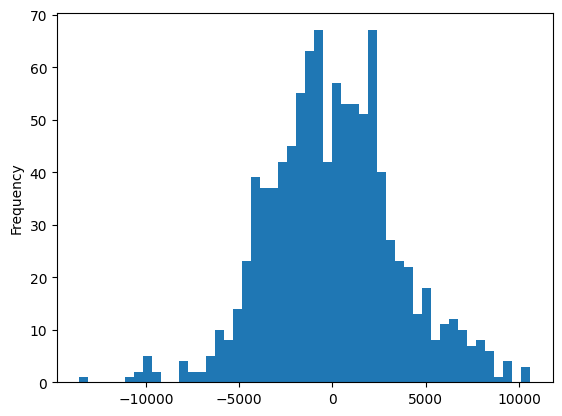

In [118]:
model.resid.plot(kind='hist', bins=50)

In [14]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['cash_flow_1']].values  
    y = group['cash_flow_2'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'gradient': model.coef_[0],
        'intercept': model.intercept_,
        'cash_flow_model': 1
    })

cash_flow_2_models = pd.DataFrame(regression_results)
print(cash_flow_2_models)

          credit_region  gradient      intercept  cash_flow_model
0              A - Asia  1.058375    2344.974392                1
1            A - Europe  1.570900  -15460.846910                1
2     A - North America  1.679625  -18176.411488                1
3     A - South America  5.168098 -171922.338557                1
4             AA - Asia  1.354902   -6092.603915                1
5           AA - Europe  1.438038   -9364.810790                1
6    AA - North America  1.487093  -11022.410065                1
7    AA - South America  1.204606   -2335.637669                1
8            AAA - Asia  1.281877   -2821.974063                1
9          AAA - Europe  1.236595   -2434.608593                1
10  AAA - North America  1.362420   -5474.865623                1
11  AAA - South America  1.315111   -2049.390888                1
12             B - Asia  1.960628  -42984.141336                1
13           B - Europe  1.642222  -26466.334236                1
14    B - 

In [15]:
grouped = training_data.groupby('credit_region')
regression_results = []

for region, group in grouped:
    X = group[['cash_flow_2']].values  
    y = group['cash_flow_3'].values 
    
    model = LinearRegression()
    model.fit(X, y)
    
    regression_results.append({
        'credit_region': region,
        'gradient': model.coef_[0],
        'intercept': model.intercept_,
        'cash_flow_model': 2
    })

cash_flow_3_models = pd.DataFrame(regression_results)
print(cash_flow_3_models)

          credit_region  gradient     intercept  cash_flow_model
0              A - Asia  1.369501 -12360.830005                2
1            A - Europe  1.495411 -16148.799723                2
2     A - North America  1.513297 -15490.298301                2
3     A - South America  1.618829 -25116.938688                2
4             AA - Asia  1.373858  -9492.175470                2
5           AA - Europe  1.470498 -12870.547851                2
6    AA - North America  1.429436 -11057.561854                2
7    AA - South America  1.299849  -8071.963780                2
8            AAA - Asia  1.344638  -6694.651301                2
9          AAA - Europe  1.369352  -8223.706969                2
10  AAA - North America  1.361923  -7775.132535                2
11  AAA - South America  1.371095  -6739.984023                2
12             B - Asia -0.000000      0.000000                2
13           B - Europe -0.000000      0.000000                2
14    B - North America  

In [16]:
models = pd.concat([cash_flow_1_models, cash_flow_2_models, cash_flow_3_models], axis=0, ignore_index=True)
models 

,credit_region,energy_capacity_coefficient,debt_to_equity_coefficient,intercept,cash_flow_model,gradient
0,A - Asia,166.752669,-2270.663745,36999.004815,0,NaN
1,A - Europe,270.715286,2707.802138,25658.456115,0,NaN
2,A - North America,350.444660,3835.957920,20547.034183,0,NaN
3,A - South America,122.561691,5.130542,37600.358505,0,NaN
4,AA - Asia,305.187726,2966.782185,22026.422319,0,NaN
...,...,...,...,...,...,...
79,BBB - South America,NaN,NaN,-19732.815601,2,1.472835
80,CCC - Asia,NaN,NaN,0.000000,2,-0.000000
81,CCC - Europe,NaN,NaN,0.000000,2,0.000000
82,CCC - North America,NaN,NaN,0.000000,2,0.000000


In [17]:
models.to_csv('model_parameters.csv', index=False)
